<a href="https://colab.research.google.com/github/sigvehaug/DSF-DCBP/blob/main/12_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12 Fitting

In science we develop and create models which sometimes also become theories. Models normally contain adjustable parameteres. Such parameters can be determined from data. This task is called parameter fitting. 

In chemical models there are parameters which have been obtained, i.e. fitted from data. Several Python modules, e.g. the stats, the optimize or the symfit modules, have fitting methods. In this notebook we look at some of them. 

When fitting data, we do optimisation, i.e. we find some minimum of a function depending on our parameters. This normally include derivatives with respect to the parameters and some optimisation function. Much used optimisation functions are 
- Least Squares
- Maximum Likelihood
- ...



In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Fitting data with stats PDFs

The scipy.stats module has many probability density functions which can be used to describe and model data. Let us fit some of the MCR data to gaussian distributions, i.e. normal models. 

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-MCR/P3HT_Abs_data_Teaching.txt' #Data-CCD/4ms_10 av_30 s_Absorbance_10-32-04-868.txt'

Mounted at /content/drive


In [3]:
# Read the MCR data into a dataframe
import pandas as pd
df = pd.read_csv(path, delimiter='\t',header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42470 entries, 0 to 42469
Columns: 238 entries, 0 to 1655.895891
dtypes: float64(238)
memory usage: 77.1 MB


In [4]:
df.head()

,0,0.1,343.5134104,349.5870756,355.6494241,361.7004283,367.7400609,373.7682942,379.7851007,385.7904529,...,1605.9536,1611.514513,1617.072493,1622.627536,1628.179638,1633.728794,1639.275002,1644.818256,1650.358554,1655.895891
0,0.000,0.6,-1027.768828,30.511045,281.801881,265.172363,237.292980,254.240534,190.109116,183.177334,...,23.671892,25.906182,23.389142,21.642225,21.016180,21.301218,22.898130,22.495454,22.559864,24.724922
1,0.013,0.6,-634.010574,-7.724907,102.303772,155.099472,238.064645,316.866260,301.584506,257.617348,...,23.169427,21.764048,24.341897,22.347100,20.549339,21.536516,20.977320,23.484311,23.336777,23.891699
2,0.022,0.6,-720.771924,121.087152,301.837486,278.988892,298.318623,290.589190,312.118275,294.980704,...,21.415348,25.416825,21.963903,18.600867,18.454721,22.950976,22.657566,24.227429,22.818681,25.003017
3,0.027,0.6,-442.747518,722.925937,600.086121,538.586982,412.512638,409.426168,378.591047,382.863347,...,24.678561,23.221489,24.341897,23.996254,22.185474,20.831003,21.696632,20.033077,23.855489,25.003017
4,0.033,0.6,NaN,566.574923,344.110670,352.286610,400.951216,357.300570,394.539207,444.438536,...,23.169427,23.464870,22.201119,21.877056,20.316106,21.066047,24.102949,22.001865,22.559864,27.234184


array([[<Axes: title={'center': '361.7004283'}>]], dtype=object)

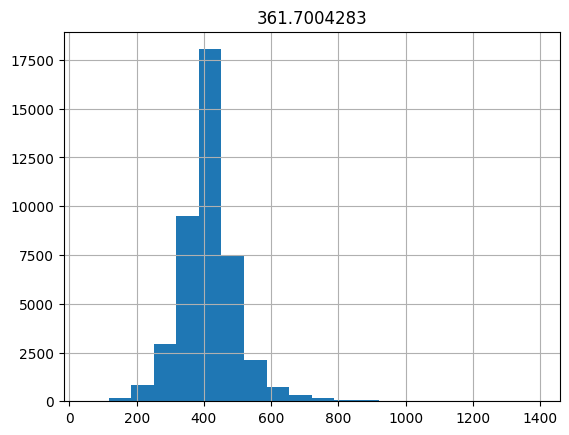

In [5]:
# Histogram of selected columns
df.hist(df.columns[5], bins=20)

In [6]:
df.iloc[:,5]

0        265.172363
1        155.099472
2        278.988892
3        538.586982
4        352.286610
            ...    
42465    475.724966
42466    409.784190
42467    386.253562
42468    325.357707
42469    403.275361
Name: 361.7004283, Length: 42470, dtype: float64

```
from scipy.stats import norm 
norm.fit(df.iloc[:,5].dropna())
```

The predefined pdfs in scipy.stats you can see https://docs.scipy.org/doc/scipy/reference/stats.html. Sometimes you want to define your own model, or it is not already implemented, or you don't find the implementation. Then you can write your own model and use the scipy.optimize modul.

## Fitting your own model with scipy.optimize

Let's practice with scipy.optimize. First we generate syntetic data from an exponential funciton with three parameters. Then we add gaussian noise to the data so that it becomes more realistic. Lastly we fit the parameters of a self-defined exponential function to that noisy data.  

```
from scipy.optimize import curve_fit

def func(x, a, b, c):
     return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50) # 
y = func(xdata, 2.5, 1.3, 0.5)
plt.plot(xdata, y, 'g-', label='Generated data')
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='Generated data with noise')
plt.legend()
plt.show()
```

```
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
plt.plot(xdata, func(xdata, *popt), 'r-',label= \
         'fit: a=%5.3f +- %5.3f, \n b=%5.3f +- %5.3f, \n c=%5.3f +-%5.3f' % \
         (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, ydata, 'b+', label='Data')
plt.legend()
plt.show()
perr = np.sqrt(np.diag(pcov)) # Standard deviation = square root of the variance being on the diagonal of the covariance matrix
perr
```

So with scipy.optimize you can define your own function/model and fit its parameters to your data. There exist other libraries which makes fitting even more convenient. In the next section we look at one. 

## Fitting with symfit

The more comprehensive module for fitting with Python is symfit (https://symfit.readthedocs.io/). By reading it's documentation, you can also learn very compactly the most important things about fitting. Let us do a short tutorial here.


In [9]:
!pip install symfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.6 MB/s eta 0:00:00


In [10]:
from symfit import Parameter, Variable, parameters

a = Parameter('a')
b = Parameter('b')
x = Variable('x')
model = a * x + b

In [16]:
from symfit import Fit
import numpy as np

xdata = np.linspace(0, 100, 100) # From 0 to 100 in 100 steps
a_vec = np.random.normal(15.0, scale=2.0, size=(100,))
b_vec = np.random.normal(100.0, scale=2.0, size=(100,))
ydata = a_vec * xdata + b_vec  # Point scattered around the line 5 * x + 105

fit = Fit(model, xdata, ydata)
fit_result = fit.execute()
fit_result.minimizer_output

{'fun': 835832.4444713595,
 'jac': array([4.07453626e-10, 1.68256520e-11]),
 'hess_inv': array([[ 1.17623762e-05, -5.88118812e-04],
        [-5.88118812e-04,  3.94059406e-02]]),
 'nfev': 7,
 'njev': 7,
 'status': 0,
 'success': True,
 'x': array([15.29540069, 91.21836129]),
 'nit': 4}

In [ ]:
fit_result.value(a)

14.898362241618518

# Voluntary Exercise

If you have time and interest, study and play with the notebook provided by the [FemtoMat](https://banerji.dcbp.unibe.ch/) group.
- https://github.com/sigvehaug/DSF-DCBP/blob/60f69ef96a4c394f6df5030259f6ea99ddbdc4b2/Fitting_Example.ipynb